# EDA - Data Preparation
This file will conduct the data preparation such as:
- **Data Analysis**
    Analyze the data using data aggregation and data visualization
- **Data transformation**
    Transform the data into the correct data type and change some value of the data
- **Data Cleaning**
    Clean the null value and duplicate data.

In [1]:
# import the used dataset
import os   # used for a better handling and fancy way to handle path

import numpy as np      # used for making a null value
import pandas as pd     # used for handle the dataframe, data cleaning, dan data transformation

import matplotlib.pyplot as plt # used for general visualization
import seaborn as sns           # used only for making the heatmap chart

from sklearn.impute import SimpleImputer    # used for data cleaning

In [2]:
# Declaring the path as global variable
PATH_MAIN = r"./../Dataset/"
PATH_18 = os.path.join(PATH_MAIN, r"IT Salary Survey EU 2018.csv")
PATH_19 = os.path.join(PATH_MAIN, r"IT Salary Survey EU 2019.csv")
PATH_20 = os.path.join(PATH_MAIN, r"IT Salary Survey EU 2020.csv")

In [3]:
# Getting the dataset (csv file) into the script
data_18 = pd.read_csv(PATH_18)
data_19 = pd.read_csv(PATH_19)
data_20 = pd.read_csv(PATH_20)

## See The Column Correlation

In [4]:
# Selecting the number type columns
temp_18 = data_18.dtypes.to_frame().reset_index()
temp_18.rename(columns={"index": "Column", 0: "Dtype"}, inplace=True)
num_col_18 = temp_18[temp_18.Dtype != 'object']

Text(0.5, 1.0, 'Column Correlation on Data 2018')

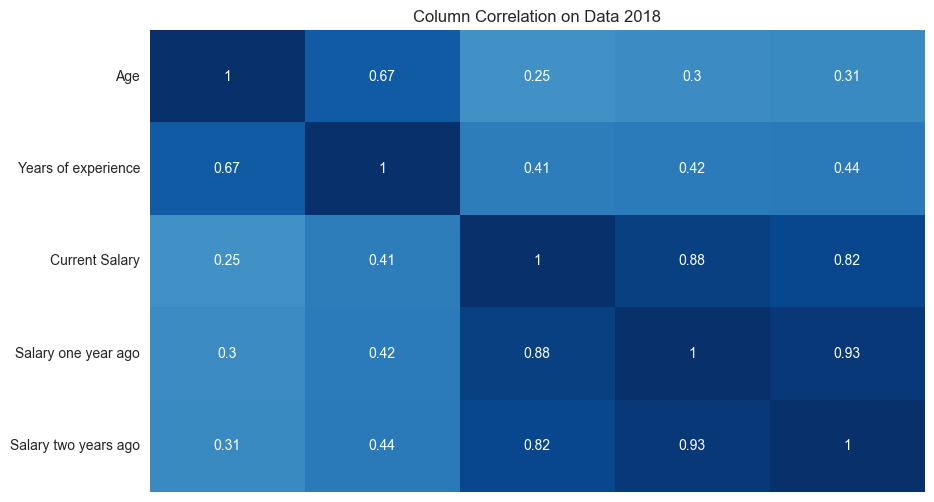

In [5]:
# Visualize the correlation value with heatmap chart
cor_data_18 = data_18[num_col_18.Column].corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cor_data_18, center=0, cmap='Blues', annot=True, cbar=False, xticklabels=False)
ax.set_title("Column Correlation on Data 2018")

**Insight**
There are several column with a high correlation such as:
- Current Salary <-> Salary one year ago
- Current Salary <-> Salary two year ago
- Salary two year ago <-> Salary two year ago

medium correlation such as:
- Age <-> Years of experience

In [6]:
# Selecting the number type columns
temp_19 = data_19.dtypes.to_frame().reset_index()
temp_19.rename(columns={"index": "Column", 0: "Dtype"}, inplace=True)
num_col_19 = temp_19[temp_19.Dtype != 'object']

Text(0.5, 1.0, 'Column Correlation on Data 2019')

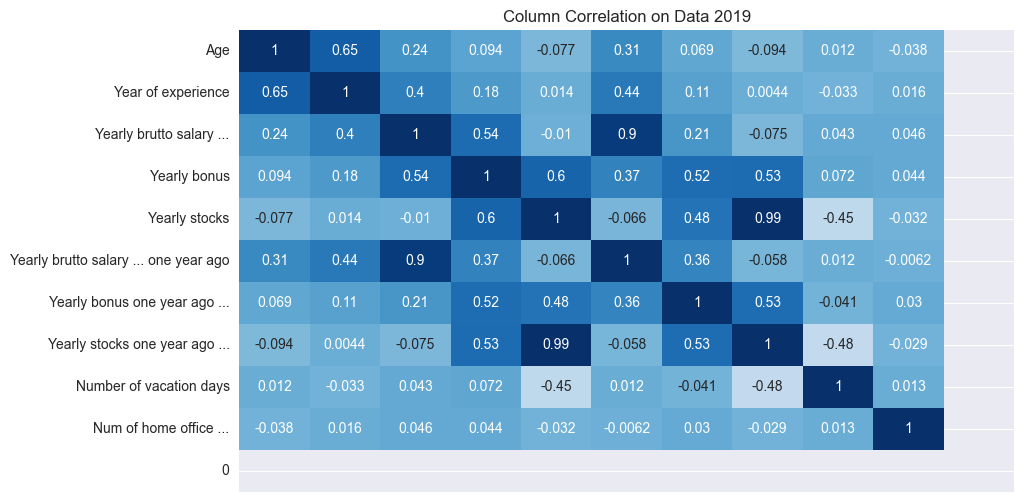

In [7]:
# Visualize the correlation value with heatmap chart
cor_data_19 = data_19[num_col_19.Column].corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cor_data_19, center=0, cmap='Blues', annot=True, cbar=False, xticklabels=False,
            yticklabels=['Age', 'Year of experience', 'Yearly brutto salary ...', 'Yearly bonus', 'Yearly stocks', 'Yearly brutto salary ... one year ago', 'Yearly bonus one year ago ...', 'Yearly stocks one year ago ...', 'Number of vacation days', 'Num of home office ...', '0'])
ax.set_title("Column Correlation on Data 2019")

**Insight**
There are several column with a high correlation such as:
- Yearly brutto salary ... <-> Yearly brutto salary ... one year ago
- Yearly stocks <-> Yearly stocks one year ago ...

medium correlation such as:
- Age <-> Years of experience

In [8]:
# Selecting the number type columns
temp_20 = data_20.dtypes.to_frame().reset_index()
temp_20.rename(columns={"index": "Column", 0: "Dtype"}, inplace=True)
num_col_20 = temp_20[temp_20.Dtype != 'object']

Text(0.5, 1.0, 'Column Correlation on Data 2020')

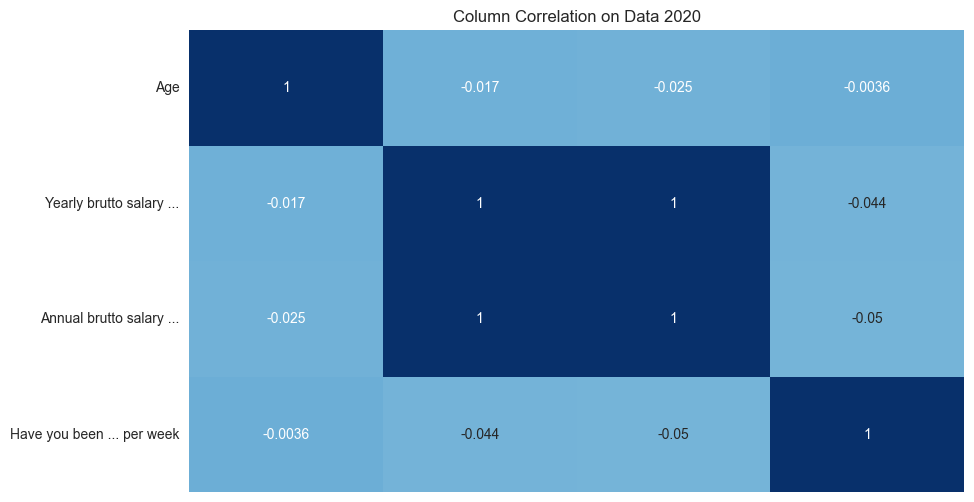

In [9]:
# Visualized the correlation value with heatmap chart
cor_data_20 = data_20[num_col_20.Column].corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cor_data_20, center=0, cmap='Blues', annot=True, cbar=False, xticklabels=False,
            yticklabels=['Age', 'Yearly brutto salary ...', 'Annual brutto salary ...', 'Have you been ... per week'])
ax.set_title("Column Correlation on Data 2020")

**Insight**
There are only 1 column with a high correlation which is:
- Yearly brutto salary ... <-> Annual brutto salary ...

## Cleaning Null Value

In [10]:
# define the replacing strategy of the null value
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
modus_imputer = SimpleImputer(strategy='most_frequent')

### 2018 Dataset

In [11]:
data_18.isna().sum()

Timestamp                               0
Age                                    93
Gender                                 14
City                                   29
Position                               28
Years of experience                    33
Your level                             22
Current Salary                         15
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                  15
Company size                           15
Company type                           35
dtype: int64

**Insight**
Almost all the column have null value, except for the Timestamp column. The column with the highest null value is "Salary two years ago" with 302 row with null value.

In [12]:
# Check unique value from each column
data_18["Your level"].value_counts()

Your level
Senior    497
Middle    206
Junior     40
Name: count, dtype: int64

**Insight**
Check the column value. The "Your level" column have 3 value. The "Position" column have many values. And many other column that I checked have various value count.

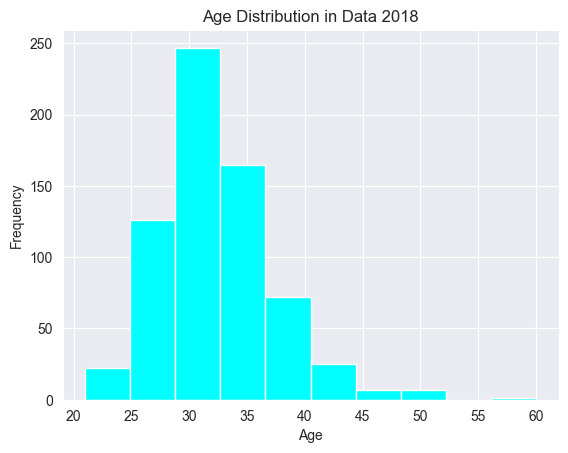

In [13]:
# plot the distribution of age column
plt.hist(list(data_18.Age), color='cyan')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Data 2018")
plt.show()

**Insight**
Age column is quite well distributed, but a little skewed to the right. But, because the ordinal type of the data. The null value should be replaced by the median value

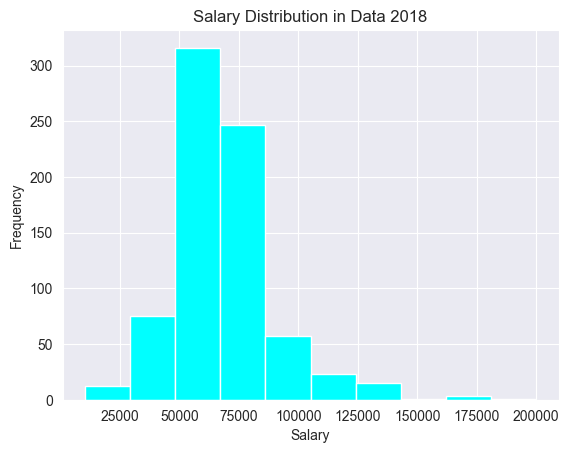

In [14]:
# plot the distribution of current salary column
plt.hist(list(data_18["Current Salary"]), color='cyan')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution in Data 2018")
plt.show()

**Insight**
Current Salary column is quite well distributed, but a little skewed to the right. So the null value should be replaced by the median value

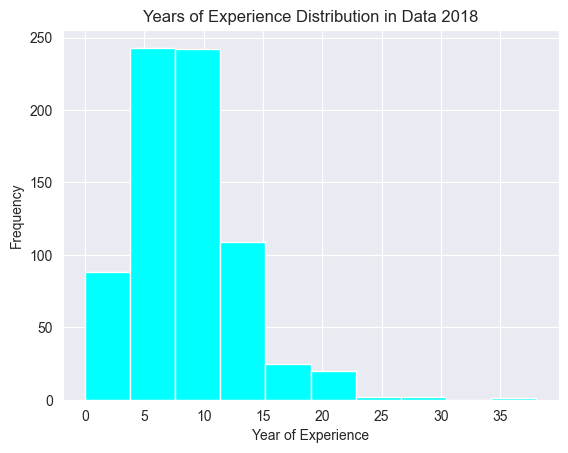

In [15]:
# plot the distribution of years of experience column
plt.hist(list(data_18["Years of experience"]), color='cyan')
plt.xlabel("Year of Experience")
plt.ylabel("Frequency")
plt.title("Years of Experience Distribution in Data 2018")
plt.show()

**Insight**
Years of experience column is skewed to the left. So the null value should be replaced by the median value.

In [16]:
# Check the data type of each column
data_18.dtypes

Timestamp                              object
Age                                   float64
Gender                                 object
City                                   object
Position                               object
Years of experience                   float64
Your level                             object
Current Salary                        float64
Salary one year ago                   float64
Salary two years ago                  float64
Are you getting any Stock Options?     object
Main language at work                  object
Company size                           object
Company type                           object
dtype: object

In [17]:
# Replacing the null value with mean
data_18[["Current Salary"]] = median_imputer.fit_transform(data_18[["Current Salary"]])

In [18]:
# Replacing the null value with median
data_18[["Age"]] = median_imputer.fit_transform(data_18[["Age"]])
data_18[["Years of experience"]] = median_imputer.fit_transform(data_18[["Years of experience"]])

In [19]:
# Replacing the null value with the most frequent value because of the object column type
data_18[["Gender"]] = modus_imputer.fit_transform(data_18[["Gender"]])
data_18[["City"]] = modus_imputer.fit_transform(data_18[["City"]])
data_18[["Company size"]] = modus_imputer.fit_transform(data_18[["Company size"]])
data_18[["Company type"]] = modus_imputer.fit_transform(data_18[["Company type"]])

In [20]:
# Replace the null value with a custom value, because of the column purpose
data_18["Position"].fillna("-", inplace=True)
data_18["Main language at work"].fillna("Others", inplace=True)
data_18["Your level"].fillna("Others", inplace=True)

In [21]:
# Replacing some value to make the data more readable
data_18["Gender"].replace(["F"], 'Female', inplace=True)
data_18["Gender"].replace(["M"], 'Male', inplace=True) # To make the gender value same across the dataset
data_18["City"] = data_20["City"].str.replace('ü', 'u')

In [22]:
# checking the null value again
data_18.isna().sum()

Timestamp                               0
Age                                     0
Gender                                  0
City                                    0
Position                                0
Years of experience                     0
Your level                              0
Current Salary                          0
Salary one year ago                   169
Salary two years ago                  302
Are you getting any Stock Options?     23
Main language at work                   0
Company size                            0
Company type                            0
dtype: int64

In [23]:
# Changing the column type
data_18["Age"] = data_18["Age"].astype('int')
data_18["Years of experience"] = data_18["Years of experience"].astype('int')
data_18[num_col_18.Column].head(5)

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
0,43,11,77000.0,76200.0,68000.0
1,33,8,65000.0,55000.0,55000.0
2,32,10,88000.0,73000.0,54000.0
3,25,6,78000.0,55000.0,45000.0
4,39,10,69000.0,60000.0,52000.0


### 2019 Dataset

In [24]:
# Check the null value
data_19.isna().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

**Insight**
Almost all the column have null value. The column with the highest null value is "0" with 991 row null value

In [25]:
# Checking the unique value from each column
data_19["Company business sector"].value_counts()

Company business sector
Сommerce                   205
Finance / Insurance        163
Transport                   86
Manufacture                 53
IT                          44
Health                      37
Tourism                     36
Software Development        30
Scientific Activities       24
Telecom                     19
Media                       13
Real Estate                 12
Automotive                  12
Education                   10
Advertising                  9
Catering                     9
Gaming                       9
Сonstruction                 8
IoT                          5
Agriculture                  5
HR                           5
Entertainment                4
Dating                       4
Marketing                    4
Logistics                    3
Security                     3
Fashion                      3
Customer Support             2
Consulting                   2
Cloud                        2
SEO                          2
Gambling       

**Insight**
Check the column unique value count. The "Company business sector" column have 52 unique value with commerce as the most.

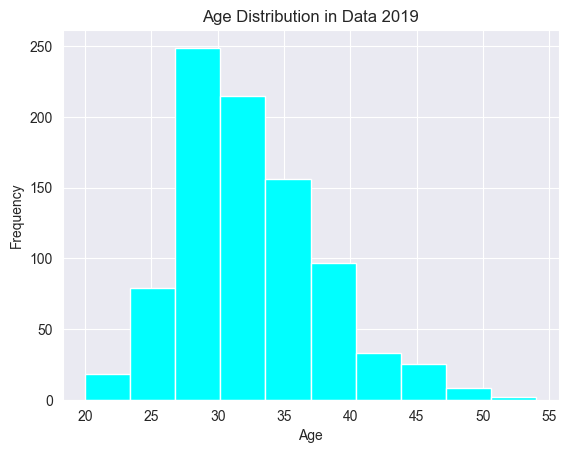

In [26]:
# plot the distribution of age column
plt.hist(list(data_19.Age), color='cyan')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Data 2019")
plt.show()

**Insight**
Age column is quite well distributed, but a little skewed to the right. But because the ordinal type of the data. The null value should be replaced by median value

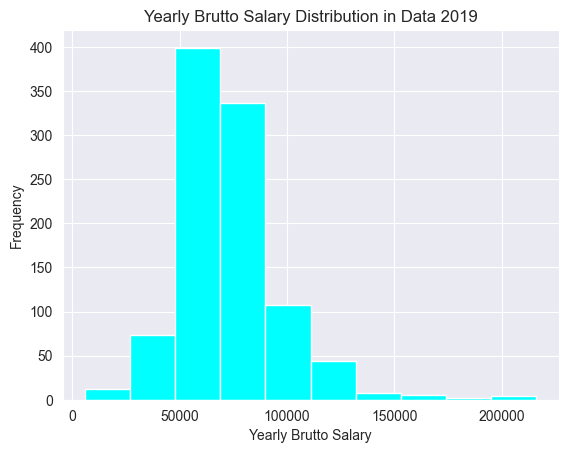

In [27]:
# plot the distribution of Yearly brutto salary ... column
plt.hist(list(data_19["Yearly brutto salary (without bonus and stocks)"]), color='cyan')
plt.xlabel("Yearly Brutto Salary")
plt.ylabel("Frequency")
plt.title("Yearly Brutto Salary Distribution in Data 2019")
plt.show()

**Insight**
Yearly brutto salary (without bonus and stocks) columns is quite well distributed. So the null value should be replaced by the mean value

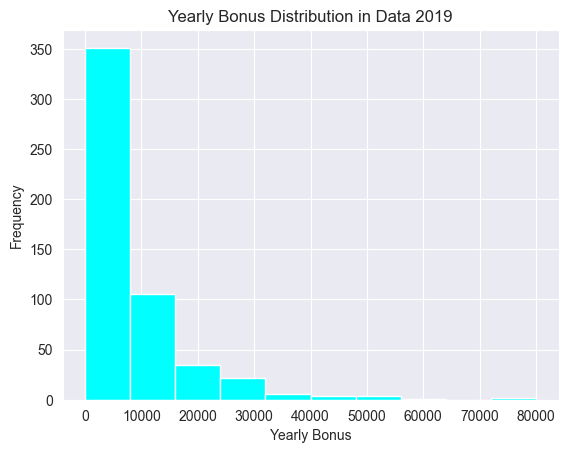

In [28]:
# plot the distribution of Yearly bonus column
plt.hist(list(data_19["Yearly bonus"]), color='cyan')
plt.xlabel("Yearly Bonus")
plt.ylabel("Frequency")
plt.title("Yearly Bonus Distribution in Data 2019")
plt.show()

**Insight**
The Yearly bonus column is very skewed to the left. So the null value should be replaced by the median value

In [29]:
# Check the data type of each column
data_19.dtypes

Zeitstempel                                                                                              object
Age                                                                                                     float64
Gender                                                                                                   object
City                                                                                                     object
Seniority level                                                                                          object
Position (without seniority)                                                                             object
Years of experience                                                                                       int64
Your main technology / programming language                                                              object
Yearly brutto salary (without bonus and stocks)                                                         

In [30]:
# Replacing the null value with mean
data_19[["Yearly brutto salary (without bonus and stocks)"]] = mean_imputer.fit_transform(data_19[["Yearly brutto salary (without bonus and stocks)"]])

In [31]:
# Replacing the null value with median
data_19[["Age"]] = median_imputer.fit_transform(data_19[["Age"]])
data_19[["Yearly bonus"]] = median_imputer.fit_transform(data_19[["Yearly bonus"]])

In [32]:
# Replacing the null value with the most frequent value because of the object column type
data_19[["Company size"]] = modus_imputer.fit_transform(data_19[["Company size"]])
data_19[["Company type"]] = modus_imputer.fit_transform(data_19[["Company type"]])

In [33]:
# Replacing the null value with a custom value, because of the column purpose
data_19["Position (without seniority)"].fillna("Others", inplace=True)
data_19["Your main technology / programming language"].fillna("Others", inplace=True)
data_19["Main language at work"].fillna("Others", inplace=True)
data_19["Seniority level"].fillna("Others", inplace=True)
data_19["Company business sector"].fillna("Others", inplace=True)

In [34]:
# Replacing some value to make the data more readable
data_19["City"] = data_20["City"].str.replace('ü', 'u')

In [35]:
# Checking the null value again
data_19.isna().sum()

Zeitstempel                                                                                               0
Age                                                                                                       0
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                           0
Position (without seniority)                                                                              0
Years of experience                                                                                       0
Your main technology / programming language                                                               0
Yearly brutto salary (without bonus and stocks)                                                           0
Yearly bonus                

In [36]:
# Check the null value
data_20.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

**Insight**
Almost all the column have null value. Column with the highest null value is "Have you been forced ..." with 880 row of null value

In [37]:
# Checking the unique value from each column
data_20["Company size"].value_counts()

Company size
1000+       448
101-1000    405
11-50       174
51-100      147
up to 10     61
Name: count, dtype: int64

**Insight**
Check the column unique value count. The "Company size" column consist of ranged ordinal value stored in object type. The "Gender" column has new value, the diverse value, a new value from previous year table. etc

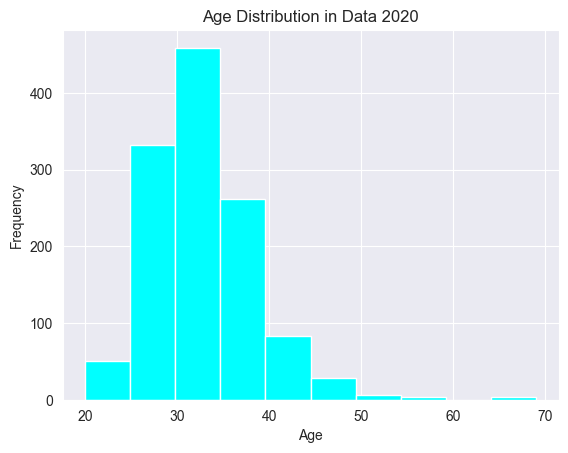

In [38]:
# plot the distribution of age column
plt.hist(list(data_20.Age), color='cyan')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Data 2020")
plt.show()

**Insight**
Age column is quite well distributed, but a little skewed to the right. But because the ordinal type of the data. The null value should be replaced by median value

In [39]:
# Check the data type of each column
data_20.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

In [40]:
# Replacing the null value with median
data_20[["Age"]] = median_imputer.fit_transform(data_20[["Age"]])

In [41]:
# Replacing the null value with the most frequent value because of the object column type
data_20[["Gender"]] = modus_imputer.fit_transform(data_20[["Gender"]])
data_20[["Total years of experience"]] = modus_imputer.fit_transform(data_20[["Total years of experience"]])
data_20[["Company size"]] = modus_imputer.fit_transform(data_20[["Company size"]])
data_20[["Company type"]] = modus_imputer.fit_transform(data_20[["Company type"]])

In [42]:
# Replacing the null value with a custom value, because of the column purpose
data_20["Position "].fillna("Others", inplace=True)
data_20["Seniority level"].fillna("Others", inplace=True)
data_20["Your main technology / programming language"].fillna("Others", inplace=True)
data_20["Main language at work"].fillna("Others", inplace=True)

In [43]:
# Replacing some value to achieve data integrity and avoid error
data_20["Gender"].replace(["Diverse"], 'Other', inplace=True) # just personal reference
# Replaced the value to avoid error on converting the column type
data_20["Yearly bonus + stocks in EUR"].replace(["15000+-"], '15000', inplace=True)
data_20["Yearly bonus + stocks in EUR"].replace(["depends", 'bvg only', 'Na', '-', 'Not sure'], np.NaN, inplace=True)
# Replaced the value to avoid error on converting the column type
data_20["Total years of experience"].replace(["6 (not as a data scientist, but as a lab scientist)"], '6', inplace=True)
data_20["Total years of experience"].replace(["15, thereof 8 as CTO"], '15', inplace=True)
data_20["Total years of experience"].replace(["1 (as QA Engineer) / 11 in total"], '11', inplace=True)
data_20["Total years of experience"].replace(["less than year"], '0.7', inplace=True)
data_20["Total years of experience"] = data_20["Total years of experience"].str.replace(',', '.')
data_20["City"] = data_20["City"].str.replace('ü', 'u') # Replacing some value to make the data more readable

In [44]:
# Changing the column type
data_20["Yearly bonus + stocks in EUR"] = data_20["Yearly bonus + stocks in EUR"].astype('float')
data_20["Total years of experience"] = data_20["Total years of experience"].astype('float')

In [45]:
# Replaced the null value with median. Placed here because the value should be change with some custom value, and the coulumn type should be change to float
data_20[["Yearly bonus + stocks in EUR"]] = median_imputer.fit_transform(data_20[["Yearly bonus + stocks in EUR"]])

In [46]:
# Rechecking the null value
data_20.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                          0
Gender                                                                                                                       0
City                                                                                                                         0
Position                                                                                                                     0
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [47]:
# Rechecking the data type of each column
data_20.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                  float64
Years of experience in Germany                                                                                              object
Seniority level                                                                    

## Cleaning Duplicate Value

In [48]:
data_18.duplicated().sum()

0

In [49]:
data_19.duplicated().sum()

0

In [50]:
data_20.duplicated().sum()

0

**Insight**
There's no duplicate value on each dataset

## Export The Cleaned Data

In [51]:
# final check
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           765 non-null    object 
 1   Age                                 765 non-null    int32  
 2   Gender                              765 non-null    object 
 3   City                                765 non-null    object 
 4   Position                            765 non-null    object 
 5   Years of experience                 765 non-null    int32  
 6   Your level                          765 non-null    object 
 7   Current Salary                      765 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  742 non-null    object 
 11  Main language at work               765 non-n

Rechecking the column type and null value existence

In [52]:
# final check
data_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   991 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       99

Rechecking the column type and null value existence

In [53]:
# final check
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1253 non-null   float64
 2   Gender                                                                                                                   1253 non-null   object 
 3   City                                                                                                                     1253 non-null   o

Rechecking the column type and null value existence

### Stored the finished data into a new dataframe

In [54]:
clean_data_18 = data_18.copy()
clean_data_19 = data_19.copy()
clean_data_20 = data_20.copy()

# Change the column name
clean_data_18.rename(columns={"Current Salary":"Salary"}, inplace=True)

clean_data_19.rename(columns={"Zeitstempel":"Timestamp"
                              ,"Position (without seniority)":"Position"
                              ,"Yearly brutto salary (without bonus and stocks)":"Salary"}, inplace=True)

clean_data_20.rename(columns={"Position ":"Position"
                              ,"Total years of experience":"Years of experience"
                              ,"Yearly brutto salary (without bonus and stocks) in EUR":"Salary"}, inplace=True)

The column name is changed, so it would be the same across the dataset

In [55]:
clean_data_18.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Salary', 'Salary one year ago', 'Salary two years ago',
       'Are you getting any Stock Options?', 'Main language at work',
       'Company size', 'Company type'],
      dtype='object')

In [56]:
clean_data_19.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Seniority level', 'Position',
       'Years of experience', 'Your main technology / programming language',
       'Salary', 'Yearly bonus', 'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')

In [57]:
clean_data_20.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your main technology / programming language',
       'Other technologies/programming languages you use often', 'Salary',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'],
      dtype='object')

### Merged the 3 dataset into 1 dataset
Only merge the same column from 3 dataset

In [58]:
merged_column = ["Timestamp", "Age", "Gender", "City", "Salary", "Position", "Years of experience", "Main language at work", "Company size", "Company type"]
merged_data = pd.concat([clean_data_18.loc[:, merged_column]
                         ,clean_data_19.loc[:, merged_column]
                         ,clean_data_20.loc[:, merged_column]], ignore_index=True)
merged_data.head(5)

,Timestamp,Age,Gender,City,Salary,Position,Years of experience,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,Male,Munich,77000.0,QA Ingenieur,11.0,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,Female,Berlin,65000.0,Senior PHP Magento developer,8.0,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,Male,Berlin,88000.0,Software Engineer,10.0,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,Male,Berlin,78000.0,Senior Frontend Developer,6.0,English,1000+,Product
4,14/12/2018 12:50:31,39.0,Male,Berlin,69000.0,UX Designer,10.0,English,100-1000,Ecom retailer


In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              3009 non-null   object 
 1   Age                    3009 non-null   float64
 2   Gender                 3009 non-null   object 
 3   City                   3009 non-null   object 
 4   Salary                 3009 non-null   float64
 5   Position               3009 non-null   object 
 6   Years of experience    3009 non-null   float64
 7   Main language at work  3009 non-null   object 
 8   Company size           3009 non-null   object 
 9   Company type           3009 non-null   object 
dtypes: float64(3), object(7)
memory usage: 235.2+ KB


### Exporting the complete cleaned and merged dataset

In [60]:
clean_data_18.to_csv("./../Dataset/[Cleaned] IT Survey EU 2018.csv", index=False)
clean_data_19.to_csv("./../Dataset/[Cleaned] IT Survey EU 2019.csv", index=False)
clean_data_20.to_csv("./../Dataset/[Cleaned] IT Survey EU 2020.csv", index=False)
merged_data.to_csv("./../Dataset/[Merged] IT Survey EU 2018-2020.csv", index=False)